In [1]:
from tensorflow import keras

In [2]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [3]:
train_input.shape

(60000, 28, 28)

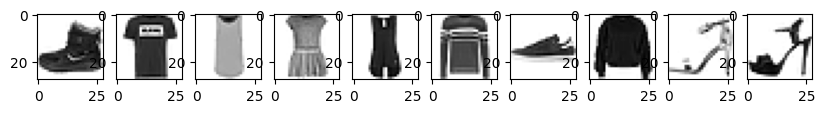

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')

plt.show()

In [5]:
train_target[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
import numpy as np
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [8]:
train_scaled.shape

(60000, 784)

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

In [11]:
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
scores

{'fit_time': array([6.8681519 , 6.91912842, 6.89109516, 7.03913021, 7.10340285]),
 'score_time': array([0.03224707, 0.05204201, 0.02898622, 0.03625059, 0.04113412]),
 'test_score': array([0.82908333, 0.81941667, 0.82075   , 0.80916667, 0.818     ])}

In [12]:
import tensorflow as tf
from tensorflow import keras

In [13]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target =\
train_test_split(train_scaled, train_target, test_size=0.2)

In [14]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model = keras.Sequential([dense])

In [16]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7368 - loss: 0.7791
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8388 - loss: 0.4797
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8442 - loss: 0.4569
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8515 - loss: 0.4425
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8543 - loss: 0.4291


In [18]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8575 - loss: 0.4269


[0.43885311484336853, 0.8519166707992554]